In [ ]:
# clustering method -> KNN

In [5]:
# data management 
from utils import * 

def data_cleaning(weatherHistory):
    
    '''
    If timestamp to next is uncommonly long, the data should not be selected by KNN algorithm
    e.g. 
    |Loud Cover | Pressure (millibars)| Daily Summary| Timestamp | Timestamp diff to next|
    |L1         | P1                  | DS1          | T1        | 3600                  |
    
    should not match with 
    e.g. 
    |Loud Cover | Pressure (millibars)| Daily Summary| Timestamp | Timestamp diff to next|
    |L2         | P2                  | DS2          | T2        | 120272400             |
    
    bcos of timestamp difference
    
    '''
    
    # Add timestamp difference
    weatherHistory['Timestamp'] = weatherHistory['Formatted Date'].apply(lambda x: datetime.datetime.strptime(x[:-10],'%Y-%m-%d %H:%M:%S').timestamp())
    weatherHistory['Timestamp diff to next'] = weatherHistory['Timestamp'].diff().shift(1)
    
    # remove non-factors
    non_factor_cols = [
        'Formatted Date',
        'Daily Summary'
    ]
    factor_cols = [col for col in weatherHistory.columns if col not in non_factor_cols]
    weatherHistory = weatherHistory[factor_cols]
    
    return weatherHistory

def convert_object_to_int(weatherHistory):
    
    # find columns containing non-floats
    data_types = weatherHistory.dtypes
    non_float_cols = data_types[data_types != float].index.tolist() 
    
    # convert object to numbers
    # e.g. Partly Cloudy -> 0.0, 'Mostly Cloudy': 1.0, ...
    for non_float_col in non_float_cols:
        items = weatherHistory[non_float_col].unique()
        mapping = {
            items[i]:float(i)
            for i in range(len(items))
        }
        weatherHistory[non_float_col] = weatherHistory[non_float_col].apply(lambda x: mapping[x])
    
    return weatherHistory
    

if __name__ == "__main__":
    # data
    weatherHistory_path = os.path.join(utils.mypath, 'Storage', 'weatherHistory.csv')
    weatherHistory = pd.read_csv(weatherHistory_path)
    
    weatherHistory = data_cleaning(weatherHistory)
    weatherHistory = convert_object_to_int(weatherHistory)

In [7]:
weatherHistory.dtypes

Summary                     float64
Precip Type                 float64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Timestamp                   float64
Timestamp diff to next      float64
dtype: object

In [71]:
    # find columns containing non-floats
    data_types = weatherHistory.dtypes
    non_float_cols = data_types[data_types != float].index.tolist() 
    
    for non_float_col in non_float_cols:
        items = weatherHistory[non_float_col].unique()
        mapping = {
            items[i]:i
            for i in range(len(items))
        }


In [80]:
mapping

{'Partly Cloudy': 0,
 'Mostly Cloudy': 1,
 'Overcast': 2,
 'Foggy': 3,
 'Breezy and Mostly Cloudy': 4,
 'Clear': 5,
 'Breezy and Partly Cloudy': 6,
 'Breezy and Overcast': 7,
 'Humid and Mostly Cloudy': 8,
 'Humid and Partly Cloudy': 9,
 'Windy and Foggy': 10,
 'Windy and Overcast': 11,
 'Breezy and Foggy': 12,
 'Windy and Partly Cloudy': 13,
 'Breezy': 14,
 'Dry and Partly Cloudy': 15,
 'Windy and Mostly Cloudy': 16,
 'Dangerously Windy and Partly Cloudy': 17,
 'Dry': 18,
 'Windy': 19,
 'Humid and Overcast': 20,
 'Light Rain': 21,
 'Drizzle': 22,
 'Windy and Dry': 23,
 'Dry and Mostly Cloudy': 24,
 'Breezy and Dry': 25,
 'Rain': 26}

In [79]:
weatherHistory[non_float_col].apply(lambda x: mapping[x])

0        0
1        0
2        1
3        0
4        1
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: Summary, Length: 96453, dtype: int64

In [72]:
mapping

{'Partly Cloudy': 0,
 'Mostly Cloudy': 1,
 'Overcast': 2,
 'Foggy': 3,
 'Breezy and Mostly Cloudy': 4,
 'Clear': 5,
 'Breezy and Partly Cloudy': 6,
 'Breezy and Overcast': 7,
 'Humid and Mostly Cloudy': 8,
 'Humid and Partly Cloudy': 9,
 'Windy and Foggy': 10,
 'Windy and Overcast': 11,
 'Breezy and Foggy': 12,
 'Windy and Partly Cloudy': 13,
 'Breezy': 14,
 'Dry and Partly Cloudy': 15,
 'Windy and Mostly Cloudy': 16,
 'Dangerously Windy and Partly Cloudy': 17,
 'Dry': 18,
 'Windy': 19,
 'Humid and Overcast': 20,
 'Light Rain': 21,
 'Drizzle': 22,
 'Windy and Dry': 23,
 'Dry and Mostly Cloudy': 24,
 'Breezy and Dry': 25,
 'Rain': 26}

In [51]:
from utils import * 
pd.set_option('display.max_rows', 500)

# data
weatherHistory_path = os.path.join(utils.mypath, 'Storage', 'weatherHistory.csv')
weatherHistory = pd.read_csv(weatherHistory_path)

# data cleaning
weatherHistory['Timestamp'] = weatherHistory['Formatted Date'].apply(lambda x: datetime.datetime.strptime(x[:-10],'%Y-%m-%d %H:%M:%S').timestamp())
weatherHistory['Timestamp diff to next'] = weatherHistory['Timestamp'].diff().shift(1)

non_factor_cols = [
    'Formatted Date',
    'Daily Summary'
]
factor_cols = [col for col in weatherHistory.columns if col not in non_factor_cols]

weatherHistory[factor_cols]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Timestamp,Timestamp diff to next
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1.143821e+09,NaN
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1.143824e+09,NaN
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1.143828e+09,3600.0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1.143832e+09,3600.0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1.143835e+09,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,1.473419e+09,3600.0
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,1.473422e+09,3600.0
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,1.473426e+09,3600.0
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,1.473430e+09,3600.0


In [43]:
weatherHistory['Timestamp Diff'].max()

120272400.0

In [46]:
from utils import * 
pd.set_option('display.max_rows', 500)

# data
weatherHistory_path = os.path.join(utils.mypath, 'Storage', 'weatherHistory.csv')
weatherHistory = pd.read_csv(weatherHistory_path)

# data cleaning
weatherHistory['Timestamp'] = weatherHistory['Formatted Date'].apply(lambda x: datetime.datetime.strptime(x[:-10],'%Y-%m-%d %H:%M:%S').timestamp())
weatherHistory['Timestamp diff to next'] = weatherHistory['Timestamp'].diff().shift(1)

# change string data to int
Summary_mapping = {}
count = 0
for Summary in weatherHistory['Summary'].unique():
    Summary_mapping[Summary] = count
    count += 1 

<AxesSubplot:>

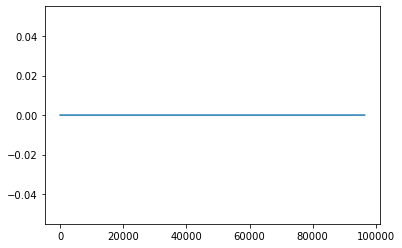

In [45]:
weatherHistory['Loud Cover'].plot()

In [43]:
weatherHistory.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [45]:
weatherHistory['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)